In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# SIFT

In [ ]:
img = cv2.imread("stephan.jpg",cv2.IMREAD_COLOR)

In [ ]:
img_crop = img[100:400, 200:600]

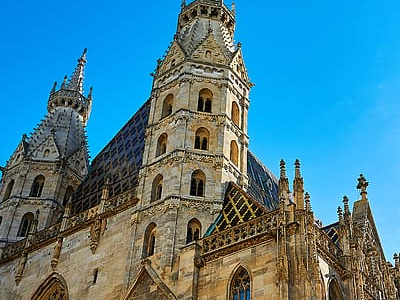

In [ ]:
cv2_imshow(img_crop)

In [ ]:
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create(100)
img_feat = sift.detect(img_crop)

In [ ]:
img_out = cv2.drawKeypoints(img_crop, img_feat,0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

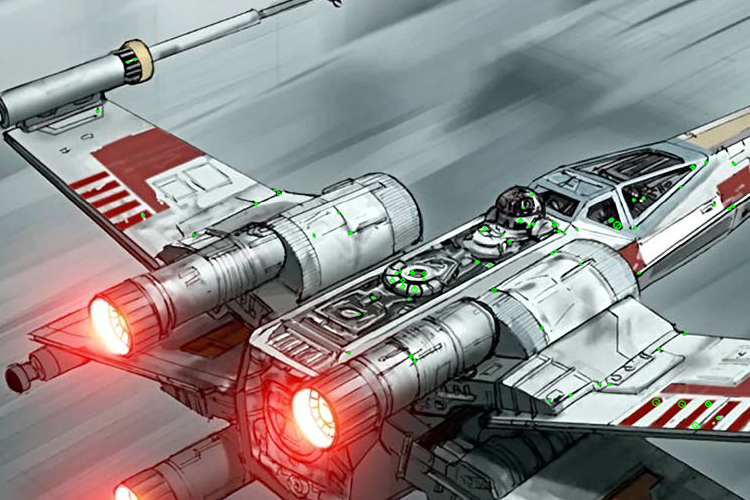

In [ ]:
cv2_imshow(img_out)

In [ ]:
cv2.imwrite("SIFT_100_x_wing_cropped.jpg", img_out)

True

# ORB

In [ ]:
orb = cv2.ORB_create(100)

In [ ]:
Ifp = orb.detect(img_gray)

In [ ]:
img_out2 = cv2.drawKeypoints(img_crop, Ifp, None, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

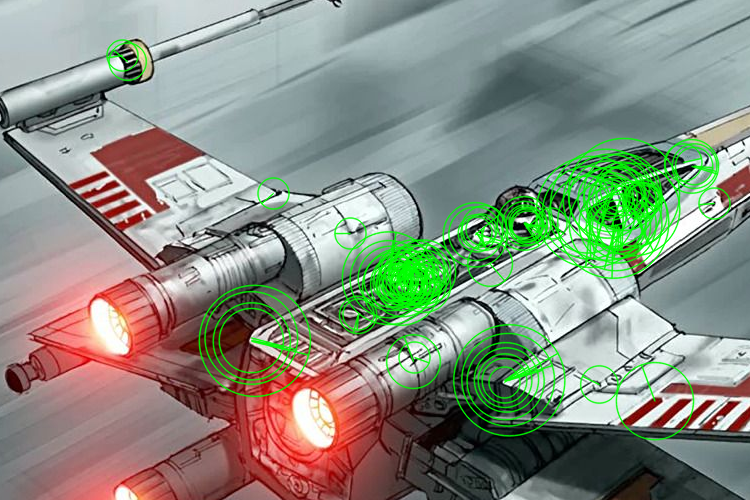

In [ ]:
cv2_imshow(img_out2)

In [ ]:
cv2.imwrite("ORB_100_x_wing_cropped.jpg", img_out2)

True

## Task 2

In [ ]:
img_all = cv2.imread("stephan.jpg",cv2.IMREAD_COLOR)
img_crop = img_all[200:400, 400:600]

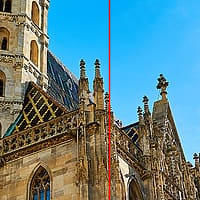

In [ ]:
cv2_imshow(img_crop)

In [ ]:
img_all_gray = cv2.cvtColor(img_all, cv2.COLOR_BGR2GRAY)

In [ ]:
img_crop_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create()

In [ ]:
img1_fp, img1_des = sift.detectAndCompute(img_crop_gray, None)

In [ ]:
img2_fp,img2_des = sift.detectAndCompute(img_all_gray, None)

In [ ]:
matcher = cv2.BFMatcher(crossCheck = False)

In [ ]:
FLANN_INDEX_KDTREE = 1

In [ ]:
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
matcher = cv2.FlannBasedMatcher(index_params, dict())

In [ ]:
matches = matcher.match(img1_des, img2_des)

In [ ]:
matches = matcher.knnMatch(img1_des, img2_des, k = 2)

In [ ]:
knn_ratio = 0.75
good = []
for m in matches:
  if len(m) > 1:
    if m[0].distance < knn_ratio*m[1].distance:
      good . append ( m [0])
matches = good

In [ ]:
num_matches = 10
matches = sorted(matches, key = lambda x:x.distance)
Imatch = cv2.drawMatches(img_all, img1_fp, img_crop, img2_fp, matches[:num_matches],
                         None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
                         matchColor = (0, 255, 0))


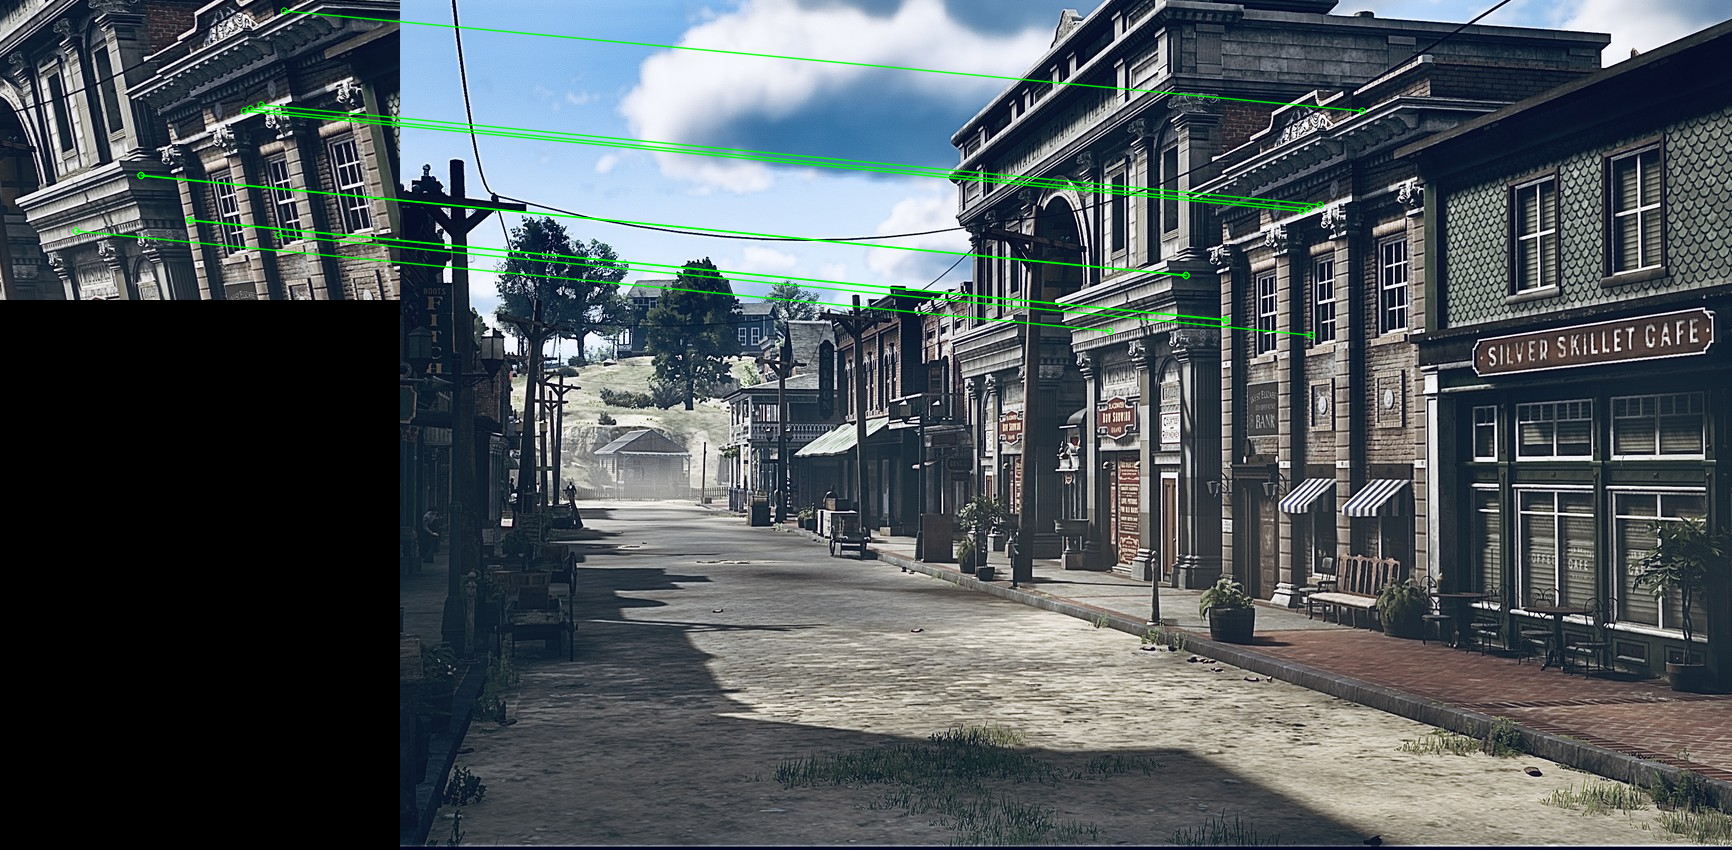

In [ ]:
cv2_imshow(Imatch)

### RANSAC

In [ ]:
MIN_MATCH_COUNT = 10
if len(matches) < MIN_MATCH_COUNT:
  print ("Not enough matches.")
I1pts = np.float32([img1_fp[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
I2pts = np.float32([img2_fp[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

In [ ]:
M, mask = cv2.findHomography(I1pts, I2pts, cv2.RANSAC, 5)

In [ ]:
mask = mask.ravel().tolist()

In [ ]:
np.round(M,3)

array([[ 1.00200e+00, -1.99000e-01,  6.79988e+02],
       [ 0.00000e+00,  1.00100e+00,  9.98820e+01],
       [ 0.00000e+00,  0.00000e+00,  1.00000e+00]])

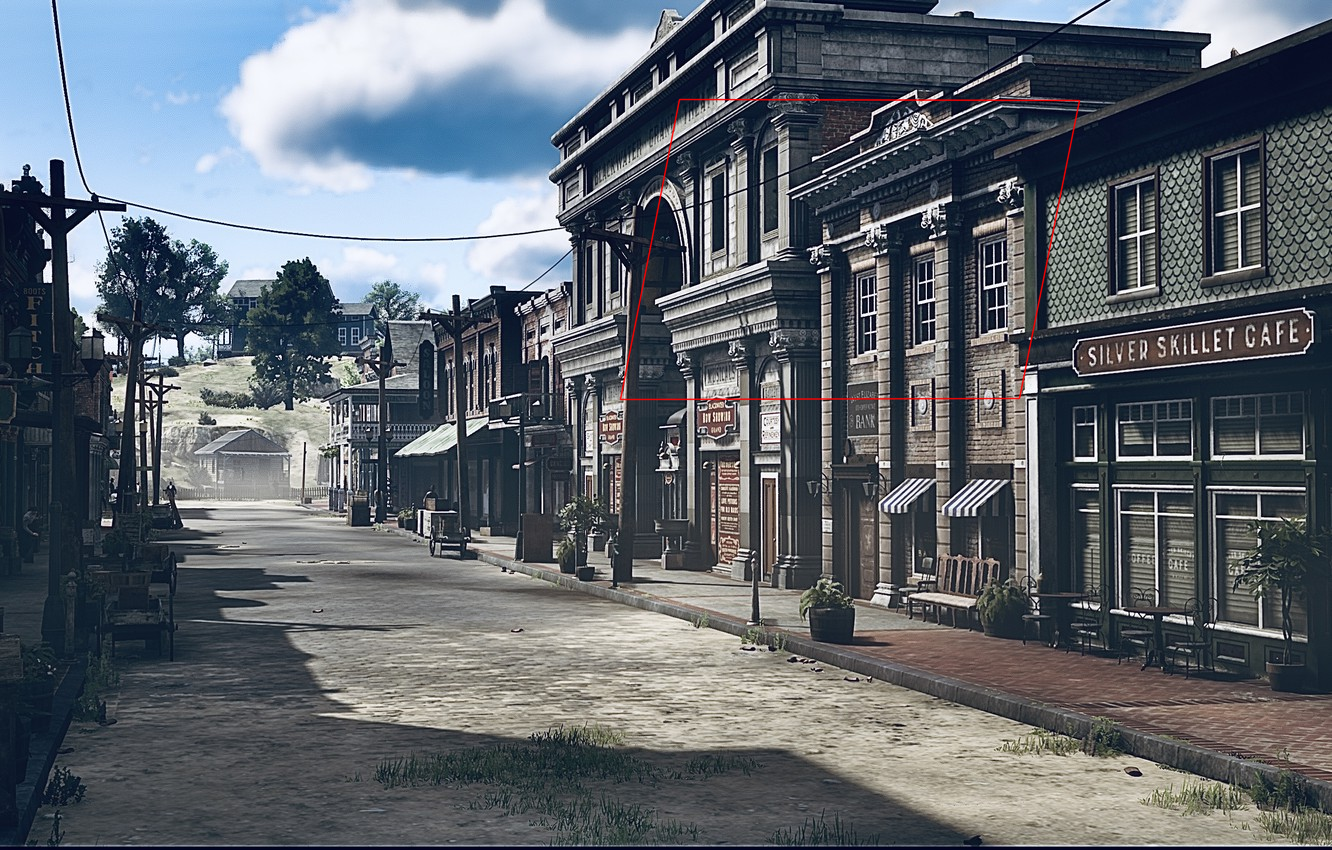

In [ ]:
h,w = img_crop.shape[:2]
I1box = np.float32([[0, 0] , [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1 ,2)
I1to2box = cv2.perspectiveTransform(I1box, M)
# Draw a red box on the second image
I2res = cv2.polylines(img_all, [np.int32(I1to2box)], True, (0, 0, 255), 1 , cv2.LINE_AA)
cv2_imshow(I2res)